In [ ]:
# loading libraries
import math
import numpy as np
import numpy.linalg as nla
import pandas as pd # type: ignore
from matplotlib import pyplot as plt
import seaborn as sns

# import folium

import warnings
warnings.filterwarnings('ignore')

In [ ]:
# reading in the data

data = pd.read_csv("birdclef-2025/train.csv")

In [ ]:
# explore data
print("Data Shape:", data.shape)
print(f"Number of Unique Values for each Column:\n{data.nunique()}")

data.head()

Data Shape: (28564, 13)
Number of Unique Values for each Column:
primary_label         206
secondary_labels      745
type                  736
filename            28564
collection              3
rating                 11
url                 28552
latitude            11042
longitude           11049
scientific_name       206
common_name           206
author               2493
license                 8
dtype: int64


,primary_label,secondary_labels,type,filename,collection,rating,url,latitude,longitude,scientific_name,common_name,author,license
0,1139490,[''],[''],1139490/CSA36385.ogg,CSA,0.0,http://colecciones.humboldt.org.co/rec/sonidos...,7.3206,-73.7128,Ragoniella pulchella,Ragoniella pulchella,Fabio A. Sarria-S,cc-by-nc-sa 4.0
1,1139490,[''],[''],1139490/CSA36389.ogg,CSA,0.0,http://colecciones.humboldt.org.co/rec/sonidos...,7.3206,-73.7128,Ragoniella pulchella,Ragoniella pulchella,Fabio A. Sarria-S,cc-by-nc-sa 4.0
2,1192948,[''],[''],1192948/CSA36358.ogg,CSA,0.0,http://colecciones.humboldt.org.co/rec/sonidos...,7.3791,-73.7313,Oxyprora surinamensis,Oxyprora surinamensis,Fabio A. Sarria-S,cc-by-nc-sa 4.0
3,1192948,[''],[''],1192948/CSA36366.ogg,CSA,0.0,http://colecciones.humboldt.org.co/rec/sonidos...,7.2800,-73.8582,Oxyprora surinamensis,Oxyprora surinamensis,Fabio A. Sarria-S,cc-by-nc-sa 4.0
4,1192948,[''],[''],1192948/CSA36373.ogg,CSA,0.0,http://colecciones.humboldt.org.co/rec/sonidos...,7.3791,-73.7313,Oxyprora surinamensis,Oxyprora surinamensis,Fabio A. Sarria-S,cc-by-nc-sa 4.0


In [ ]:
# mapping primary - scientific - common labels
mapped = data[["primary_label", "scientific_name", "common_name"]]

mapped = mapped.drop_duplicates()
mapped.index = range(len(mapped))
mapped

,primary_label,scientific_name,common_name
0,1139490,Ragoniella pulchella,Ragoniella pulchella
1,1192948,Oxyprora surinamensis,Oxyprora surinamensis
2,1194042,Copiphora colombiae,Copiphora colombiae
3,126247,Leptodactylus insularum,Spotted Foam-nest Frog
4,1346504,Neoconocephalus brachypterus,Neoconocephalus brachypterus
...,...,...,...
201,yehcar1,Milvago chimachima,Yellow-headed Caracara
202,yelori1,Icterus nigrogularis,Yellow Oriole
203,yeofly1,Tolmomyias sulphurescens,Yellow-olive Flycatcher
204,yercac1,Cacicus cela,Yellow-rumped Cacique


**Here, we can confirm that the primary labels are 1:1 mapped to scientific names and common names**

In [ ]:
# also looking into the species
spec_dat = pd.read_csv("birdclef-2025/taxonomy.csv")

In [ ]:
print("Shape of Species data:", spec_dat.shape)
print(f"Unique values:\n{spec_dat.nunique()}")
spec_dat.head()
# taking out the taxon_id since it's duplicated
spec_dat = spec_dat.drop("inat_taxon_id", axis = 1)

print(spec_dat["class_name"].value_counts())
spec_dat.head()
# we have class name for each primary label

Shape of Species data: (206, 5)
Unique values:
primary_label      206
inat_taxon_id      206
scientific_name    206
common_name        206
class_name           4
dtype: int64
class_name
Aves        146
Amphibia     34
Insecta      17
Mammalia      9
Name: count, dtype: int64


,primary_label,scientific_name,common_name,class_name
0,1139490,Ragoniella pulchella,Ragoniella pulchella,Insecta
1,1192948,Oxyprora surinamensis,Oxyprora surinamensis,Insecta
2,1194042,Copiphora colombiae,Copiphora colombiae,Insecta
3,126247,Leptodactylus insularum,Spotted Foam-nest Frog,Amphibia
4,1346504,Neoconocephalus brachypterus,Neoconocephalus brachypterus,Insecta


In [ ]:
# merging class_name
full_data = pd.merge(data, spec_dat, on = ["primary_label", "scientific_name", "common_name"], how = "left")
full_data.head()

,primary_label,secondary_labels,type,filename,collection,rating,url,latitude,longitude,scientific_name,common_name,author,license,class_name
0,1139490,[''],[''],1139490/CSA36385.ogg,CSA,0.0,http://colecciones.humboldt.org.co/rec/sonidos...,7.3206,-73.7128,Ragoniella pulchella,Ragoniella pulchella,Fabio A. Sarria-S,cc-by-nc-sa 4.0,Insecta
1,1139490,[''],[''],1139490/CSA36389.ogg,CSA,0.0,http://colecciones.humboldt.org.co/rec/sonidos...,7.3206,-73.7128,Ragoniella pulchella,Ragoniella pulchella,Fabio A. Sarria-S,cc-by-nc-sa 4.0,Insecta
2,1192948,[''],[''],1192948/CSA36358.ogg,CSA,0.0,http://colecciones.humboldt.org.co/rec/sonidos...,7.3791,-73.7313,Oxyprora surinamensis,Oxyprora surinamensis,Fabio A. Sarria-S,cc-by-nc-sa 4.0,Insecta
3,1192948,[''],[''],1192948/CSA36366.ogg,CSA,0.0,http://colecciones.humboldt.org.co/rec/sonidos...,7.2800,-73.8582,Oxyprora surinamensis,Oxyprora surinamensis,Fabio A. Sarria-S,cc-by-nc-sa 4.0,Insecta
4,1192948,[''],[''],1192948/CSA36373.ogg,CSA,0.0,http://colecciones.humboldt.org.co/rec/sonidos...,7.3791,-73.7313,Oxyprora surinamensis,Oxyprora surinamensis,Fabio A. Sarria-S,cc-by-nc-sa 4.0,Insecta


In [ ]:
full_data.dtypes

primary_label        object
secondary_labels     object
type                 object
filename             object
collection           object
rating              float64
url                  object
latitude            float64
longitude           float64
scientific_name      object
common_name          object
author               object
license              object
class_name           object
dtype: object

In [ ]:
full_data = full_data.replace(to_replace=r"\[''\]", value=pd.NA, regex=True)
full_data.isna().sum()

primary_label           0
secondary_labels    25885
type                 8099
filename                0
collection              0
rating                  0
url                     0
latitude              809
longitude             809
scientific_name         0
common_name             0
author                  0
license                 0
class_name              0
dtype: int64

In [ ]:
pd.set_option('display.max_rows', None)

full_data["type"].value_counts()

type
['song']                                                                                            9437
['call']                                                                                            5746
['call', 'song']                                                                                    1088
['flight call']                                                                                      804
['alarm call']                                                                                       346
['call', 'calls']                                                                                    178
['dawn song']                                                                                        170
['uncertain']                                                                                        168
['call', 'flight call']                                                                              163
['flight call', 'song']                           

In [ ]:
# song/canto call/whistle/chamado; uncertain/?/no idea/aberrant; sound/noise/sonido/wing/drum/rattle; flight call; alarm call/alarm;
sound_categories = {
    "song/canto": {"song", "duet", "canto"},
    "call": {"call", "llamado"},
    "uncertain": {"uncertain", "?", "no idea", "aberrant"},
    "mating/groups": {"lek", "communal"},
    "hatching": {"hatch"},
    "immitation": {"immitation", "mimic"},
    "noise/drum": {"drumming", "rattle", "noise", "wing", "sound", "sonido", "tamborilar", "human", "dog", "cow", "frog"}
}

In [ ]:
import ast

sound = full_data[full_data["type"].notna()][["type", "class_name"]]
sound = pd.DataFrame(sound)
sound["type_list"] = sound["type"].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else [])


def parse_label(label):
    label = label.strip().lower()
    if label.endswith("?"):
        return label[:-1].strip(), True
    return label, False

def parse_labels_list(label_list):
    parsed = [parse_label(lbl) for lbl in label_list]
    clean_labels = [lbl for lbl, _ in parsed]
    is_uncertain = any(flag for _, flag in parsed)
    return clean_labels, is_uncertain

sound[["clean_labels", "has_uncertain"]] = sound["type_list"].apply(
    lambda labels: pd.Series(parse_labels_list(labels))
)

sound.head()

,type,class_name,type_list,clean_labels,has_uncertain
9,['advertisement call'],Amphibia,[advertisement call],[advertisement call],False
20,['advertisement call'],Amphibia,[advertisement call],[advertisement call],False
130,['advertisement call'],Amphibia,[advertisement call],[advertisement call],False
131,['territorial call'],Amphibia,[territorial call],[territorial call],False
177,['flight call'],Amphibia,[flight call],[flight call],False


In [ ]:
def assign_categories(label_str, category_dict):
    label = label_str.lower()
    matched_categories = []
    for category, keywords in category_dict.items():
        if any(keyword in label for keyword in keywords):
            matched_categories.append(category)
    return matched_categories if matched_categories else ["other"]

sound["category"] = sound["type"].astype(str).apply(lambda x: assign_categories(x, sound_categories))


In [ ]:
sound.head(30)

,type,class_name,type_list,clean_labels,has_uncertain,category
9,['advertisement call'],Amphibia,[advertisement call],[advertisement call],False,[call]
20,['advertisement call'],Amphibia,[advertisement call],[advertisement call],False,[call]
130,['advertisement call'],Amphibia,[advertisement call],[advertisement call],False,[call]
131,['territorial call'],Amphibia,[territorial call],[territorial call],False,[call]
177,['flight call'],Amphibia,[flight call],[flight call],False,[call]
184,['advertisement call'],Amphibia,[advertisement call],[advertisement call],False,[call]
185,"['advertisement call', 'chorus']",Amphibia,"[advertisement call, chorus]","[advertisement call, chorus]",False,[call]
186,['uncertain'],Amphibia,[uncertain],[uncertain],False,[uncertain]
230,['advertisement call'],Amphibia,[advertisement call],[advertisement call],False,[call]
231,['advertisement call'],Amphibia,[advertisement call],[advertisement call],False,[call]


In [ ]:
for category, keywords in sound_categories.items():
    sound[category] = sound["clean_labels"].apply(
        lambda labels: any(
            any(keyword in label for keyword in keywords)
            for label in labels
        )
    )

In [ ]:
sound.head()

,type,class_name,type_list,clean_labels,has_uncertain,category,song/canto,call,uncertain,mating/groups,hatching,immitation,noise/drum
9,['advertisement call'],Amphibia,[advertisement call],[advertisement call],False,[call],False,True,False,False,False,False,False
20,['advertisement call'],Amphibia,[advertisement call],[advertisement call],False,[call],False,True,False,False,False,False,False
130,['advertisement call'],Amphibia,[advertisement call],[advertisement call],False,[call],False,True,False,False,False,False,False
131,['territorial call'],Amphibia,[territorial call],[territorial call],False,[call],False,True,False,False,False,False,False
177,['flight call'],Amphibia,[flight call],[flight call],False,[call],False,True,False,False,False,False,False


**Distribution EDA**

In [ ]:
full_data.columns

# full_data["class_name"].value_counts()

Index(['primary_label', 'secondary_labels', 'type', 'filename', 'collection',
       'rating', 'url', 'latitude', 'longitude', 'scientific_name',
       'common_name', 'author', 'license', 'class_name'],
      dtype='object')

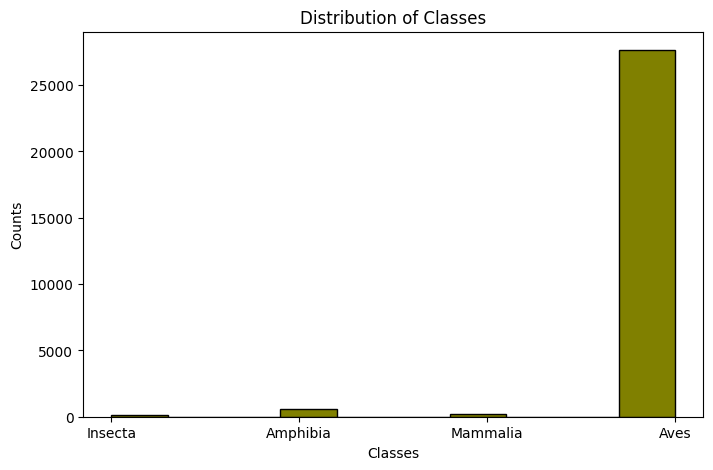

In [ ]:
plt.figure(figsize = (8, 5))

plt.hist(full_data["class_name"], color='olive', edgecolor='black')
plt.xlabel("Classes")
plt.ylabel("Counts")
plt.title("Distribution of Classes")
plt.show()


In [ ]:
insecta = full_data[full_data["class_name"] == "Insecta"]
amphibia = full_data[full_data["class_name"] == "Amphibia"]
mammalia = full_data[full_data["class_name"] == "Mammalia"]
aves = full_data[full_data["class_name"] == "Aves"]

insecta = insecta.sort_values("primary_label")
amphibia = amphibia.sort_values("primary_label")
mammalia = mammalia.sort_values("primary_label")
aves = aves.sort_values("primary_label")

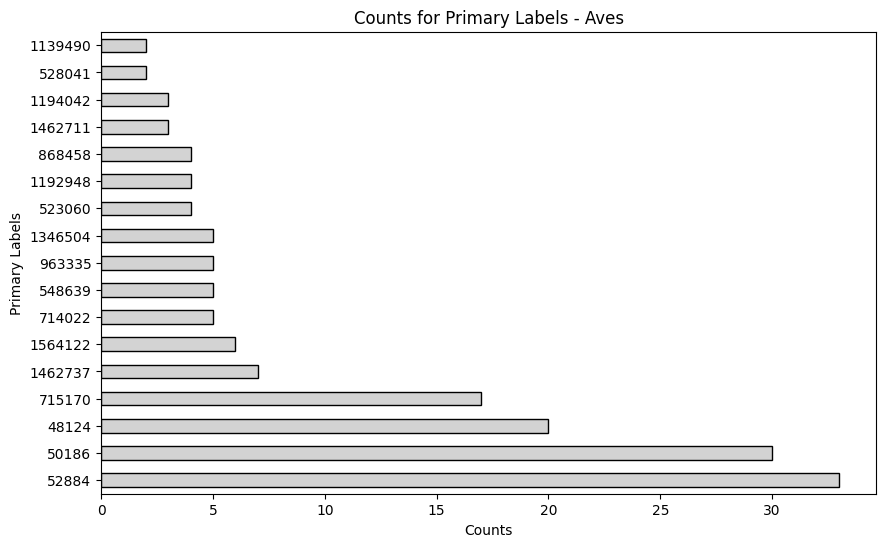

In [ ]:
insecta_counts = insecta["primary_label"].value_counts()

plt.figure(figsize = (10, 6))
insecta_counts.plot(kind = "barh", color = "lightgrey", edgecolor = "black")
# plt.hist(aves["primary_label"], bins = 146, color = "skyblue", edgecolor = "black", orientation = "horizontal")
plt.xlabel("Counts")
plt.ylabel("Primary Labels")
plt.title("Counts for Primary Labels - Aves")
plt.show()

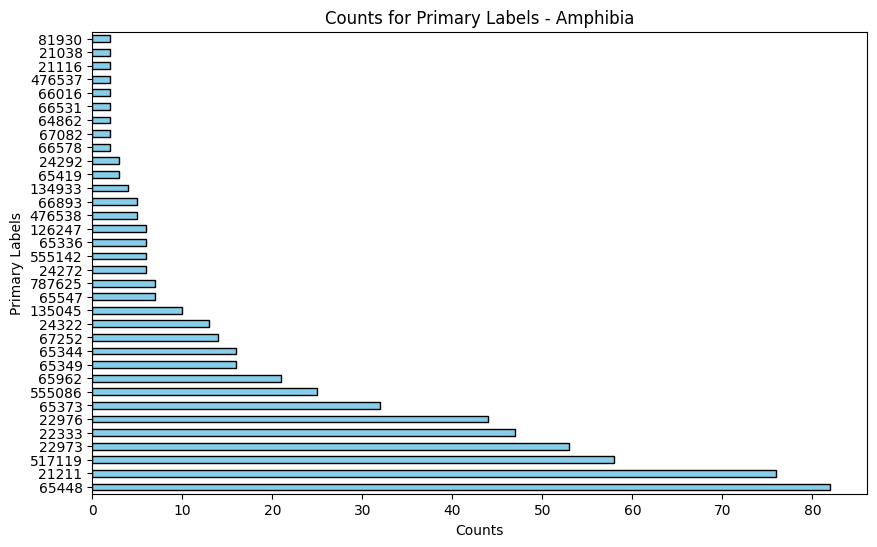

In [ ]:
amphibia_counts = amphibia["primary_label"].value_counts()

plt.figure(figsize = (10, 6))
amphibia_counts.plot(kind = "barh", color = "skyblue", edgecolor = "black")
plt.xlabel("Counts")
plt.ylabel("Primary Labels")
plt.title("Counts for Primary Labels - Amphibia")
plt.show()

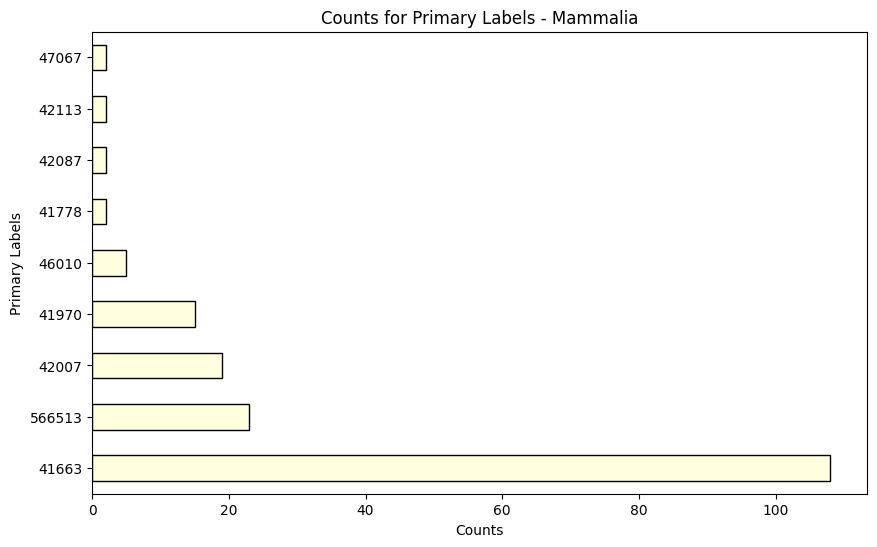

In [ ]:
mammalia_counts = mammalia["primary_label"].value_counts()

plt.figure(figsize = (10, 6))
mammalia_counts.plot(kind = "barh", color = "lightyellow", edgecolor = "black")
plt.xlabel("Counts")
plt.ylabel("Primary Labels")
plt.title("Counts for Primary Labels - Mammalia")
plt.show()

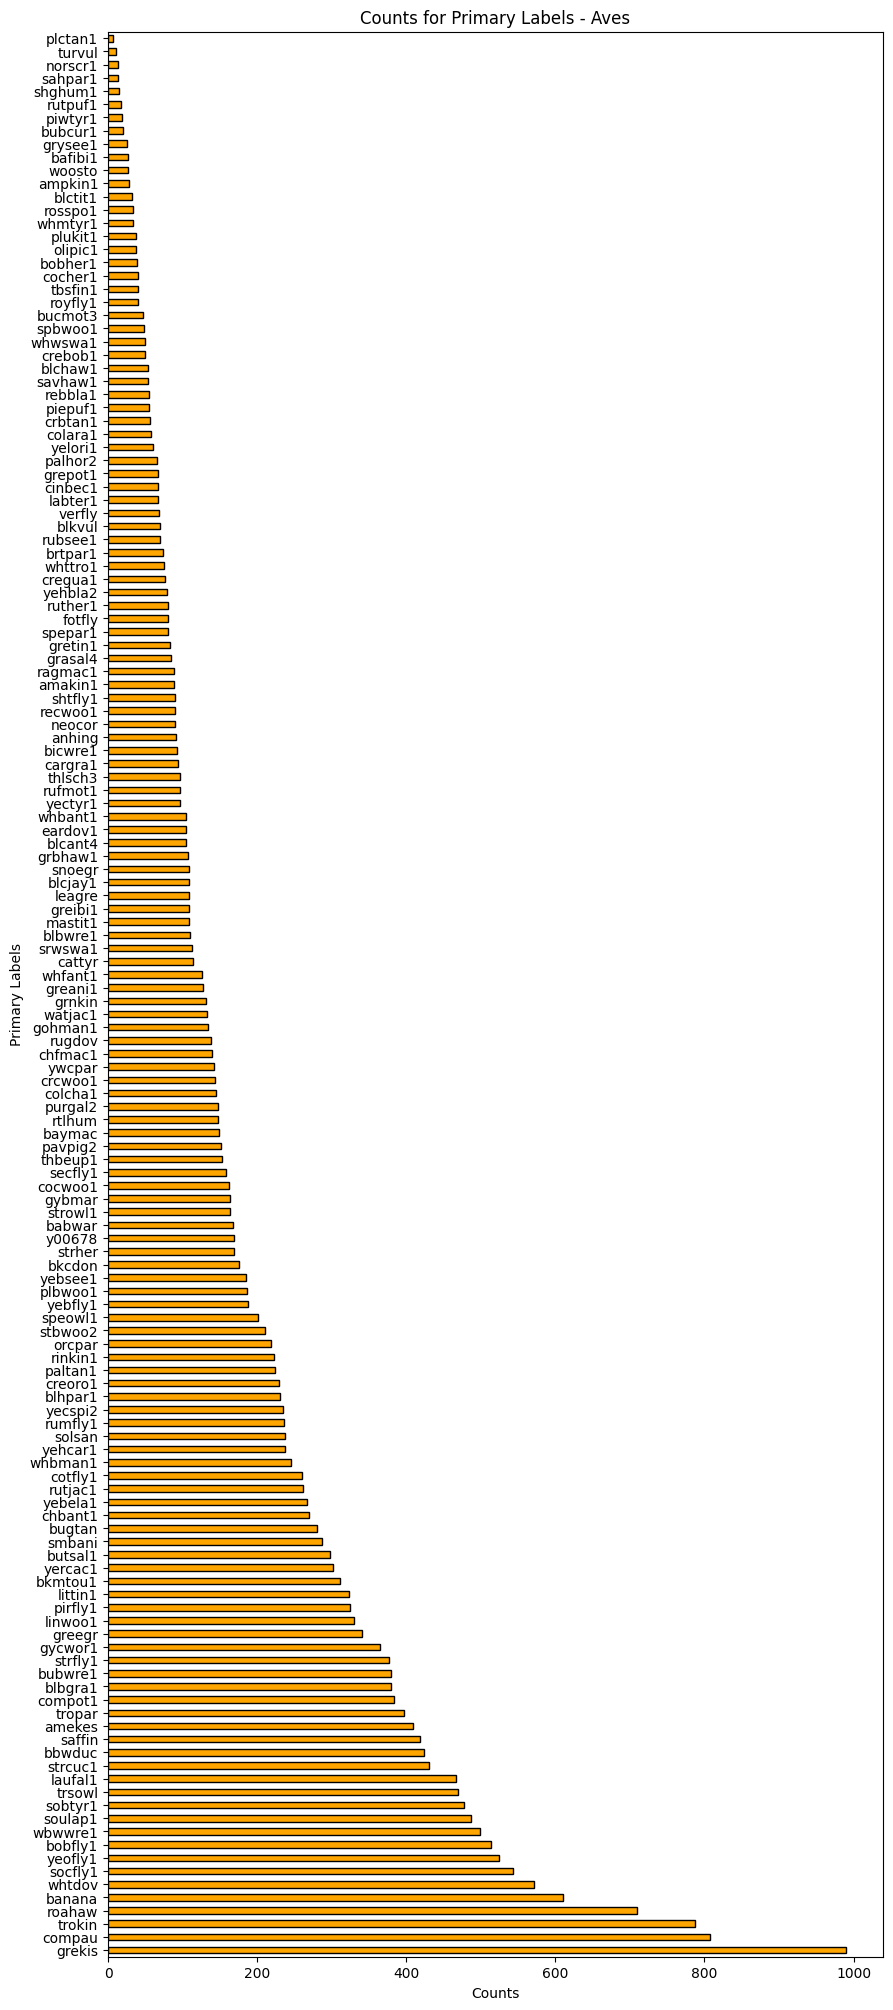

In [ ]:
aves.nunique()

aves_counts = aves["primary_label"].value_counts()

plt.figure(figsize = (10, 25))
aves_counts.plot(kind = "barh", color = "orange", edgecolor = "black")
# plt.hist(aves["primary_label"], bins = 146, color = "skyblue", edgecolor = "black", orientation = "horizontal")
plt.xlabel("Counts")
plt.ylabel("Primary Labels")
plt.title("Counts for Primary Labels - Aves")
plt.show()

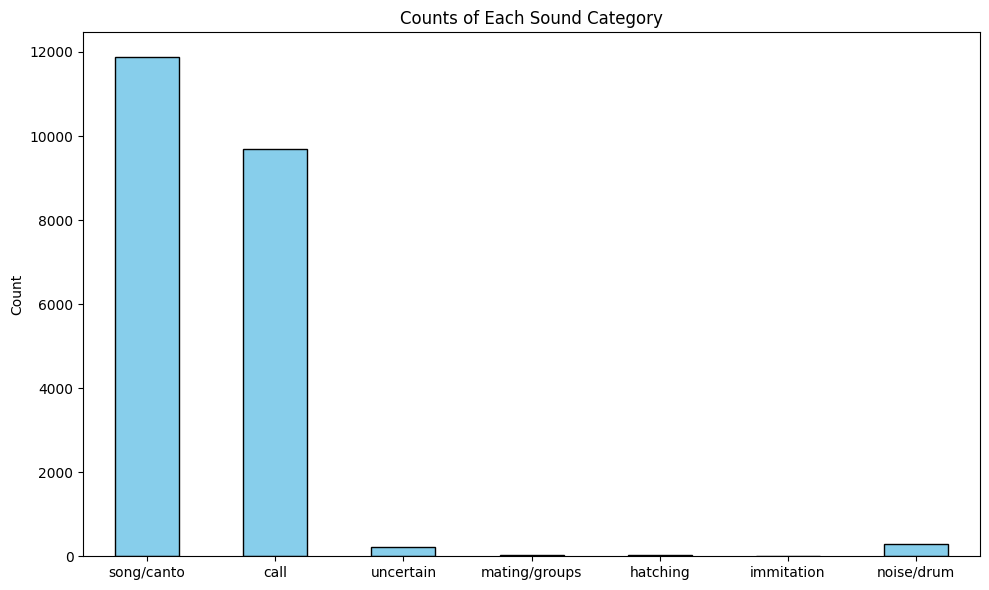

In [ ]:
song_cat = ["song/canto", "call", "uncertain", "mating/groups", "hatching", "immitation", "noise/drum"]

counts = sound[song_cat].sum()

# Plot
plt.figure(figsize=(10, 6))
counts.plot(kind='bar', color='skyblue', edgecolor = "black")
plt.title('Counts of Each Sound Category')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


In [ ]:
insecta_sound = sound[sound["class_name"] == "Insecta"]
amphibia_sound = sound[sound["class_name"] == "Amphibia"]
mammalia_sound = sound[sound["class_name"] == "Mammalia"]
aves_sound = sound[sound["class_name"] == "Aves"]

# shapes
print("Insecta sounds:", insecta_sound.shape)
print("Amphibia_sounds:", amphibia_sound.shape)
print("Mammalia sounds:", mammalia_sound.shape)
print("Aves sounds:", aves_sound.shape)

Insecta sounds: (0, 13)
Amphibia_sounds: (31, 13)
Mammalia sounds: (16, 13)
Aves sounds: (20418, 13)


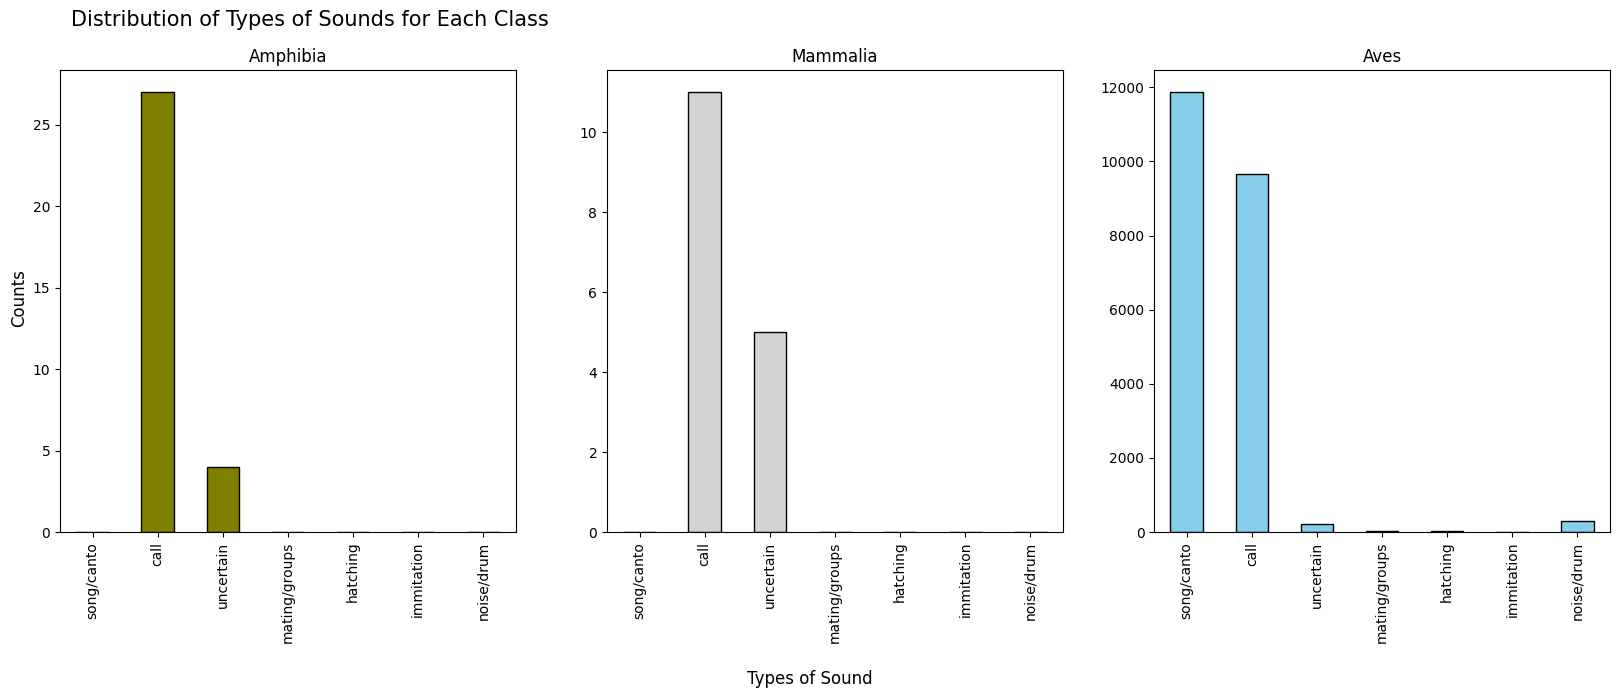

In [ ]:
amphibia_counts = amphibia_sound[song_cat].sum()
mammalia_counts = mammalia_sound[song_cat].sum()
aves_counts = aves_sound[song_cat].sum()

fig, axes = plt.subplots(1, 3, figsize = (20, 6))

amphibia_counts.plot(kind = "bar", color = "olive", edgecolor = "black", ax = axes[0])
axes[0].set_title("Amphibia")

mammalia_counts.plot(kind = "bar", color = "lightgrey", edgecolor = "black", ax = axes[1])
axes[1].set_title("Mammalia")

aves_counts.plot(kind = "bar", color = "skyblue", edgecolor = "black", ax = axes[2])
axes[2].set_title("Aves")

fig.suptitle("Distribution of Types of Sounds for Each Class", x = .25, fontsize = 15)
fig.supylabel("Counts", x = .1)
fig.supxlabel("Types of Sound", y = -.15)

plt.show()
